In [193]:
%matplotlib inline
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt


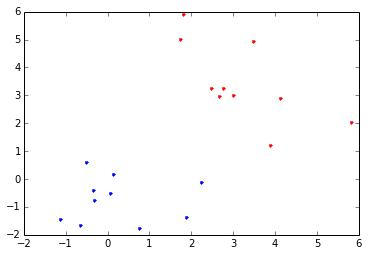

In [195]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [3, 3]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

1) What is an equation of line/plane? 

2) Explain geometrical interpretation of the two parameters

3) How do you determine whether a point $\vec{x}$ is one side of the line or another?

4) Given a line, is $\vec{w}$ and $b$ unique. (Are there two equation that represents the same line?)

5) Give another equation for the line represent by $\vec{w}=[1,2]$, $b=3$.

6) If we want $b$ in the previous equation to be 1. What should $\vec{w}$ be

In [178]:
#minimize_with(w,b) 1/2 |w|^2
#subject to y*(w dot x + b) = 0

7) Draw a line defined by $\vec{w}=[2,3]$, $b=1$.

In [196]:
w = np.array([2, 3])
b = 1

In [180]:
def calY(x):
    return (-w[0] * x - b)/w[1]

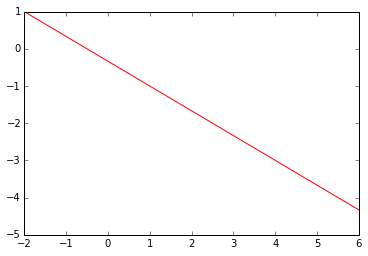

In [181]:
xs = np.linspace(-2, 6, 100) 
ys = np.array([ calY(x) for x in xs ])
plt.plot(xs, ys, 'r')

8) Draw a green point on the side where $\vec{w}\cdot\x + b > 0$ and a blue point on the other side.

In [182]:
# def assignColor(grp, xs, more):
#     if more:
#         for x in xs:
#             r = calY(x)
#             print r
#             if r > 0:
#                 grp.append(x)
#     else:
#         for x in xs:
#             if calY(x) > 0:
#                 grp.append(x)
#     return grp

In [183]:
def calYY(x):
    return np.dot(w, x) + b

In [184]:
greenIdx = np.array( [ True if calYY(x) > 0 else False for x in xp] 
                   + [ True if calYY(x) > 0 else False for x in xm])

blueIdx = np.array( [ True if calYY(x) < 0 else False for x in xp] 
                  + [ True if calYY(x) < 0 else False for x in xm])
# bluem = np.array(  [ True if calY(x) < 0 else False for x in xm[:, 0] ] )

In [185]:
green = data[greenIdx] #np.concatenate( (xp[greenp], xm[greenm]), axis = 0 )
blue = data[blueIdx] #np.concatenate( (xp[bluep], xm[bluem]), axis = 0)

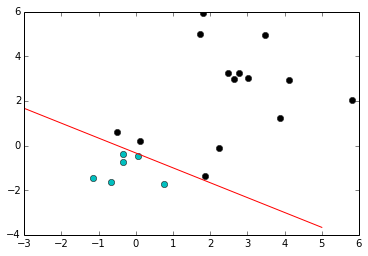

In [186]:
xs = np.linspace(-3, 5, 100) 
ys = np.array([ calY(x) for x in xs ])
plt.plot(green[:, 0], green[:, 1], 'ok')
plt.plot(blue[:, 0], blue[:, 1], 'oc')
plt.plot(xs, ys, 'r')

9) What is a linearly separable data?

10) What is a margin?

11) How do we calculate the margin? And with that formula what kind of normalization are we using?

$$ \frac{2}{|\vec{w}|}    $$

12) What are we trying to optimize? What are our contraint?

We try to optimize margin, $\vec{w}$ with contraint $ y^{i} (\vec{w} \bullet \vec{x^{i}} + b) - 1 \ge 0$

13) Can we use gradient descent with constrained optimization? Why?

14) Given these data points find the line of maximum margin. Draw it along with data points.

Use numpy.optimize.minimize with method = SLSQP

Read the doc here.
http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

  status: 9
 success: False
    njev: 101
    nfev: 869
     fun: 9.2751701643044528e-17
       x: array([ -9.99978433e-01,  -7.73102689e-09,  -5.74307625e-09])
 message: 'Iteration limit exceeded'
     jac: array([  0.00000000e+00,  -5.60892596e-10,   3.41500870e-09,
         0.00000000e+00])
     nit: 101


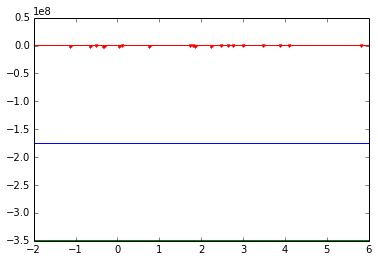

In [202]:
def cost(ws):
    b = ws[0]
    w = ws[1:]
    return np.linalg.norm(w)**2


def constraints(ws):
    b = ws[0]
    w = ws[1:]
    #print classes*(np.dot(data, w) + b) - 1
    return classes*(np.dot(data, w) + b) - 1

cons = ({'type': 'ineq',
         'fun' : constraints})

res = minimize(cost, [1., 2., 3.], method="SLSQP", constraints=cons)

print res 
b = res.x[0]
w = res.x[1:]
m = -w[0]/w[1]
c = -b/w[1]

xs = np.linspace(-2, 6, 100)
ys = m*xs + c
plt.plot(data[:, 0], data[:, 1], '.r')
plt.plot(xs, ys)

m = -w[0]/w[1]
cl = -(b-1)/w[1]
xs = np.linspace(-2, 6, 100)
yls = m*xs + cl
plt.plot(xs,yls)

m = -w[0]/w[1]
cr = -(b+1)/w[1]
xs = np.linspace(-2, 6, 100)
yrs = m*xs + cr
plt.plot(xs,yrs)

15) What is a slack variable?

16) How do we penalize the slack variable.

17) Plot soft margin cost function along with logistic cost.

18) How can we view our new and penalized cost function as a regularization?

19) Try your new cost function with these data points.

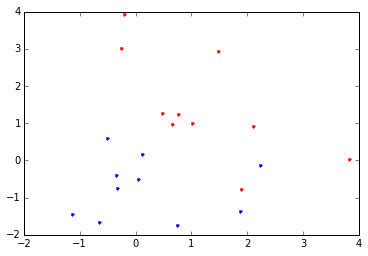

In [227]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [1, 1]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

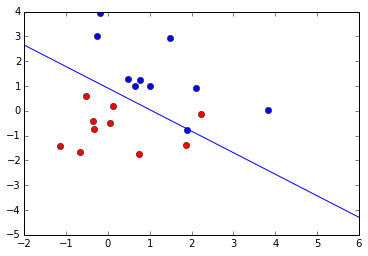

In [213]:
C = 100
def cost(ws):
    b = ws[0]
    w = ws[1:]
    xi = [max (0, 1 - y*(np.dot(x, w) + b)) for y,x in zip(classes, data)]
    sum_xi = sum(xi)
    return np.linalg.norm(w)**2 + C*sum_xi

res = minimize(cost, [1., 2., 3.])

b = res.x[0]
w = res.x[1:]
m = -w[0]/w[1]
c = -b/w[1]

xs = np.linspace(-2, 6, 100)
ys = m*xs + c

plt.plot(data[classes==1, 0], data[classes==1, 1], 'or')
plt.plot(data[classes==-1, 0], data[classes==-1, 1], 'ob')
plt.plot(xs, ys)

In [233]:
# def transform(x):
#     x1, x2 = x
#     return [x1, x2, x1*x2, x1**2, x2**2]

# tdata = np.array([transform(x) for x in data])

# C = 100
# def cost(ws):
#     b = ws[0]
#     w = ws[1:]
#     xi = [max (0, 1 - y*(np.dot(x, w) + b)) for y,x in zip(classes, tdata)]
#     sum_xi = sum(xi)
#     return np.linalg.norm(w)**2 + C*sum_xi

# res = minimize(cost, [0., 1., 2., 3., 4., 5.])

# b = res.x[0]
# w = res.x[1:]

# xs = np.linspace(-1, 1, 100)
# ys = np.linspace(-1, 1, 100)
# zs = np.empty((100,100))

# for ix, x in enumerate(xs):
#     for iy, y in enumerate(ys):
#         tx = transform([x, y])
#         zs[iy, ix] = np.dot(w, tx) + b

# plt.plot(data[classes==1, 0], data[classes==1, 1], 'or')
# plt.plot(data[classes==-1, 0], data[classes==-1, 1], 'ob')
# plt.contourf(xs, ys, zs)

20) What if we want a curved line? Draw contour plot.

[-1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1]


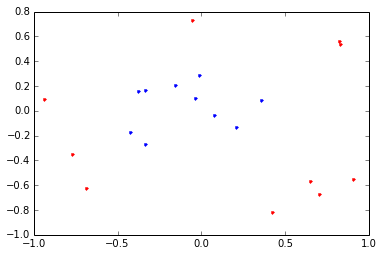

In [234]:
np.random.seed(9999)
data = np.random.random((20,2))*2-1
def is_pos(x):
    return 1 if np.linalg.norm(x-[0.1,0.1])<0.6 else -1
classes = np.array([is_pos(x) for x in data])
print classes
plt.plot(data[classes==1,0], data[classes==1,1], '.b')
plt.plot(data[classes==-1,0], data[classes==-1,1], '.r')

<matplotlib.contour.QuadContourSet instance at 0x109031830>

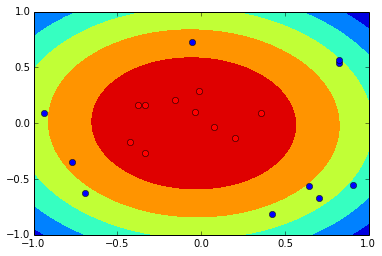

In [235]:
def transform(x):
    x1, x2 = x
    return [x1, x2, x1*x2, x1**2, x2**2]

tdata = np.array([transform(x) for x in data])

C = 100
def cost(ws):
    b = ws[0]
    w = ws[1:]
    xi = [max (0, 1 - y*(np.dot(x, w) + b)) for y,x in zip(classes, tdata)]
    sum_xi = sum(xi)
    return np.linalg.norm(w)**2 + C*sum_xi

res = minimize(cost, [0., 1., 2., 3., 4., 5.])

b = res.x[0]
w = res.x[1:]

xs = np.linspace(-1, 1, 100)
ys = np.linspace(-1, 1, 100)
zs = np.empty((100,100))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        tx = transform([x, y])
        zs[iy, ix] = np.dot(w, tx) + b

plt.plot(data[classes==1, 0], data[classes==1, 1], 'or')
plt.plot(data[classes==-1, 0], data[classes==-1, 1], 'ob')
plt.contourf(xs, ys, zs)

21) What are the support vectors?

<a list of 10 text.Text objects>

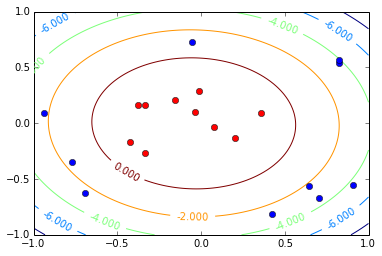

In [237]:
plt.plot(data[classes==1, 0], data[classes==1, 1], 'or')
plt.plot(data[classes==-1, 0], data[classes==-1, 1], 'ob')
ct = plt.contour(xs, ys, zs)
plt.clabel(ct)